In [12]:
import pandas as pd
import numpy as np
from pyfume import *

In [13]:
selected_features = ["Tave", "Tmax", "Tmin", "Relative_yield_change"]
train_data = pd.read_csv("dataset/matlab_1_train.csv")[selected_features]
test_data = pd.read_csv("dataset/matlab_1_test.csv")[selected_features]

In [14]:
train_data

,Tave,Tmax,Tmin,Relative_yield_change
0,18.67500,25.39096,3.57540,0.0545
1,19.76250,34.45457,5.27420,0.8182
2,30.10000,41.91501,18.08905,-0.1525
3,18.16667,25.69895,6.81734,-0.1485
4,23.83333,34.08730,12.49785,-0.4000
...,...,...,...,...
1024,24.42500,26.67880,17.19974,0.0233
1025,20.65000,30.93442,7.87919,-0.0259
1026,22.40000,33.63775,8.52692,0.0417
1027,18.12857,30.01427,8.12122,-0.5328


In [15]:
# Generate the Takagi-Sugeno FIS
FIS = pyFUME(dataframe=train_data, nr_clus=3)



In [16]:
# Calculate and print the accuracy of the generated model
RMSE=FIS.calculate_error(method="RMSE")
print ("The estimated RMSE of the developed model is:", RMSE)

The estimated RMSE of the developed model is: 0.34362433065606884


In [17]:
test = FIS.get_model()

In [18]:
dir(test)

['Mamdani_inference',
 'Sugeno_inference',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_banner',
 '_constants',
 '_crispvalues',
 '_detected_type',
 '_lvs',
 '_operators',
 '_outputfunctions',
 '_outputfuzzysets',
 '_rules',
 '_sanitize',
 '_sanitize_input',
 '_set_model_type',
 '_variables',
 'add_linguistic_variable',
 'add_rules',
 'add_rules_from_file',
 'aggregate',
 'get_firing_strengths',
 'get_fuzzy_set',
 'get_fuzzy_sets',
 'get_rules',
 'inference',
 'mediate',
 'mediate_Mamdani',
 'plot_surface',
 'plot_variable',
 'probabilistic_inference',
 'produce_figure',
 'replace_rule',
 'set_constant',
 'set_crisp_output_value',
 'set_output_fu

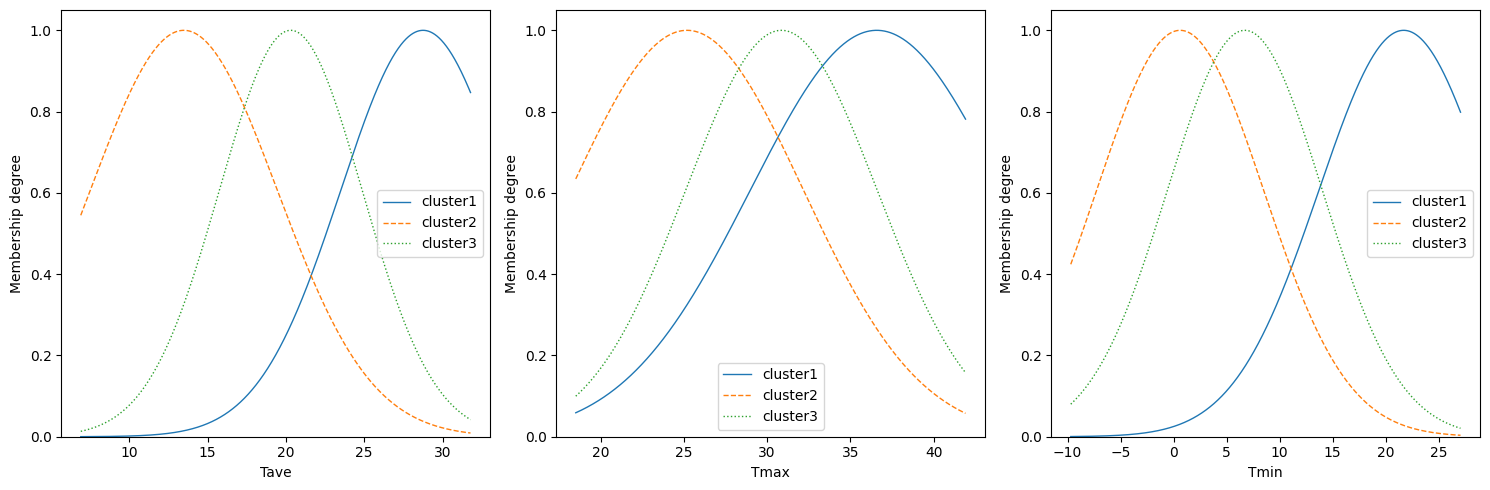

In [19]:
test.produce_figure()

In [20]:
test.get_rules()

['IF ((Tave IS cluster1) AND ((Tmax IS cluster1) AND (Tmin IS cluster1))) THEN (OUTPUT IS fun1)',
 'IF ((Tave IS cluster2) AND ((Tmax IS cluster2) AND (Tmin IS cluster2))) THEN (OUTPUT IS fun2)',
 'IF ((Tave IS cluster3) AND ((Tmax IS cluster3) AND (Tmin IS cluster3))) THEN (OUTPUT IS fun3)',
 'IF ((Tave IS cluster1) AND ((Tmax IS cluster1) AND (Tmin IS cluster1))) THEN (OUTPUT IS fun1)',
 'IF ((Tave IS cluster2) AND ((Tmax IS cluster2) AND (Tmin IS cluster2))) THEN (OUTPUT IS fun2)',
 'IF ((Tave IS cluster3) AND ((Tmax IS cluster3) AND (Tmin IS cluster3))) THEN (OUTPUT IS fun3)']

In [21]:
test._outputfunctions

OrderedDict([('fun1',
              '4.588443e-02*Tave+-1.339733e-02*Tmax+-1.892194e-02*Tmin+-3.561233e-01'),
             ('fun2',
              '4.569108e-03*Tave+9.736062e-03*Tmax+-7.339191e-04*Tmin+-3.798248e-01'),
             ('fun3',
              '5.483614e-02*Tave+2.399846e-03*Tmax+-2.256654e-02*Tmin+-9.774359e-01')])